# load the file

In [1]:
import pandas as pd
import numpy as np

filename="examples/bwa_mem_0.7.15.1_example.csv"
df=pd.read_csv(filename)

# look for infrequent attributes

    * infrequent attributes
        * attribute values that are used with < 0.01 frequency
        * example take the attribute memtotal: 
            * memtotal=0
                * this (attribute,value) pair is highly unlikely and probably caused by an error
                * use this Jupyter notebook to find and remove it
                
                
    * clustered attributes
        * attributes, value pairs whose use are clustered to a short time frame
        * example: take the attribute reference_file_unicorn
            * reference_file_unicorn can be set to 0 or 1
            * your dataset looks like this:
              reference_file_unicorn=[0,0,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
              reference_file_unicorn was set to 1 once 3 times and never used again
            * calculate the distances between the times where reference_file_unicorn is set to 1
              distances=[2,3,1]
            * return the median of the distances
              median_distance=2

In [2]:
from numpy import median
import math
def get_median_distance(series, value):

    if (type(value)==float or type(value)==np.float64) and math.isnan(value):
        positions = list(pd.isnull(series).nonzero()[0])
    else:
        # get positions
        positions=indices = [i for i, x in enumerate(list(series)) if x == value]
        
    total_amount = len(list(series))
    freq=len(positions)/total_amount

    distances=[]
    for x in range(len(positions)):
        for y in range(x+1, len(positions[x:])):
            distance=(positions[y]-positions[x])
            distances.append(distance)
            
    
    return median(distances)

In [3]:
# get the median distance for a attribute value pair that is fully saturated
# [1,1,1,1,1,.....,1,1,1,1,,1]
# to do this we will use the runtime column since it should aways exist and be non-zero valued

# This function will take a while

column=pd.Series([math.nan if math.isnan(x) else 1 if x>0 else 0 for x in df["runtime"]])
median_distance_for_runtime=get_median_distance(column, 1)
print("median distance if total saturation: ", median_distance_for_runtime)

median distance if total saturation:  5857.0


In [4]:
# get median distance and frequecny for whole dataset
# if frequency of value > 0.2:
#          don't caluclate median_distance because it takes too long

cols=list(df)
frequencies=pd.DataFrame(columns=("feature", "value", "frequency", "median_distance"))
for i in range(df.shape[1]):
    if df[cols[i]].dtype == object:
        column=df[cols[i]]
    else:
        column=pd.Series([math.nan if math.isnan(x) else 1 if x>0 else 0 for x in df[cols[i]]])
    
    total=df.shape[0]
    counts=column.value_counts(dropna=False)
    freqs=counts/total
    
    
    for key, freq in freqs.iteritems():
        if freq > 0.2:
            frequencies=frequencies.append({"feature": cols[i], "value": key, "frequency": freq},ignore_index=True)
            continue
        md=get_median_distance(column, key)
#         print(cols[i], key, freq, md)
        if math.isnan(md):
            frequencies=frequencies.append({"feature": cols[i], "value": key, "frequency": freq, 
                                        "median_distance": -1},ignore_index=True)
            continue
        frequencies=frequencies.append({"feature": cols[i], "value": key, "frequency": freq, 
                                        "median_distance": md},ignore_index=True)
print("done")

/Users/atyrysh/development/ber1/.venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/atyrysh/development/ber1/.venv/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


done


# look at the suspect features

if median_distance == -1.0 that means that there was only one job with that (feature, value)
    so the median_distance couldn't be calculated
    
if median_distance == NaN that means that we didn't calculate the median distance because frequency > 0.2 and it would be too time consuming to calculate median_distance

In [5]:
frequencies.sort_values("frequency")

,feature,value,frequency,median_distance
75,parameters.reference_source.ref_file,equCab1,0.000050,-1.0
25,memtotal,NaN,0.000050,-1.0
79,parameters.reference_source.ref_file,papHam1,0.000050,-1.0
78,parameters.reference_source.ref_file,ce9,0.000050,-1.0
74,parameters.reference_source.ref_file,canFam2,0.000050,-1.0
77,parameters.reference_source.ref_file,Schizosaccharomyces_pombe_1.1,0.000050,-1.0
81,parameters.reference_source.ref_file,mm9female,0.000050,-1.0
76,parameters.reference_source.ref_file,galGal3full,0.000050,-1.0
80,parameters.reference_source.ref_file,equCab2,0.000050,-1.0
87,processor_count,0,0.000100,13409.0


# remove jobs with infrequent attributes

* remove job if frequency < 0.01
* remove job if median_distance < 1000

* for datasets of different sizes change these to appropriate filters

In [6]:
to_remove = frequencies[(frequencies["median_distance"]<1000) | (frequencies["frequency"]<0.01)]

print("number of jobs: ", df.shape[0])



# df2["memtotal"].unique()
for index, row in to_remove.iterrows():
    if type(row["value"]) == float and math.isnan(row["value"]):
        df=df[df[row["feature"]].notnull()]
    df=df[df[row["feature"]] != row["value"]]
    print("number of jobs after",row["feature"], row["value"], "filter:", df.shape[0])
    

number of jobs:  19996
number of jobs after destination_id reserved_multi filter: 19822
number of jobs after destination_id stampede_normal filter: 19788
number of jobs after destination_id stampede_development filter: 19773
number of jobs after fastq_input1 0 filter: 19724
number of jobs after fastq_input2 0.0 filter: 19720
number of jobs after job_runner_name pulsar_stampede filter: 19720
number of jobs after memtotal nan filter: 19719
number of jobs after parameters.analysis_type.algorithmic_options.algorithmic_options_selector set filter: 19433
number of jobs after parameters.analysis_type.io_options.io_options_selector do_not_set filter: 19339
number of jobs after parameters.analysis_type.scoring_options.scoring_options_selector set filter: 19331
number of jobs after parameters.reference_source.index_a bwtsw filter: 19293
number of jobs after parameters.reference_source.index_a is filter: 19282
number of jobs after parameters.reference_source.ref_file vicPac1 filter: 18918
number 

# save the file

In [7]:
filename="examples/bwa_mem_filtered_outliers.csv"
df.to_csv(filename, index=False)

# or go straight into a random forest

In [8]:
# some simple cleaning to ensure that the random forest is ok with the data
# numerical columns cast to float and nan's are filled with zeros
# categorical columns are cast to string. nan's here are ok
for column in df:
    try:
        df[column] = df[column].astype(float)
        df[column]=df[column].fillna(0)
    except (ValueError,TypeError):
        df[column] = df[column].astype(str)
        continue

In [9]:
# seperate features and labels, which is usually "runtime"
# also, log transform the runtime to get better predictions
features,labels=df,df.pop("runtime")
labels=np.log1p(labels)

In [10]:
# train test split

from sklearn.model_selection import train_test_split

# options
###############
split=True
random_split=False
test_size=0.2
###############
test_start=len(labels)-int(len(labels)*test_size)

if split and random_split:
    tr_features, ev_features, tr_labels, ev_labels = train_test_split(features, labels, test_size=test_size)
elif split:
    tr_feats, tr_labels = features[:test_start], labels[:test_start]
    ev_feats, ev_labels = features[test_start:], labels[test_start:]
else: 
    tr_feats, tr_labels = features, labels
    ev_feats, ev_labels = features, labels

In [11]:
# some more preproprcessing, but it's important
from sklearn_pandas import gen_features
from sklearn_pandas import DataFrameMapper
import sklearn

ncols=[[i] for i in list(tr_feats.select_dtypes(include=[float]))]

nfeats = gen_features(
     columns=ncols,
      classes=[{
          'class':sklearn.preprocessing.MinMaxScaler,
      }]  
)
sfeats = gen_features(
     columns=list(tr_feats.select_dtypes(include=[object])),
     classes=[sklearn.preprocessing.LabelBinarizer]  
)

mapper = DataFrameMapper(nfeats+sfeats,df_out=True)
tr_feats=mapper.fit_transform(tr_feats)
ev_feats=mapper.transform(ev_feats)

In [12]:
# training the random forest

from skgarden import RandomForestRegressor
regr=RandomForestRegressor(n_estimators=100, max_depth=12)
regr.fit(tr_feats,tr_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_variance=0.0,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
# predicting

ev_preds=regr.predict(ev_feats, return_std=True)

In [14]:
# load the predictions into a pandas df
# you also get the standard deviation 
# but since the runtime was log transformed before training
# make sure to add the standard deviation to the mean before unlogging (np.expm1)

cq=pd.DataFrame()
cq["real"]=np.expm1(ev_labels)
cq["mean"]=np.expm1(ev_preds[0])
cq["mean-1std"]=np.expm1(ev_preds[0]-ev_preds[1])
cq["mean+1std"]=np.expm1(ev_preds[0]+ev_preds[1])

<ErrorbarContainer object of 3 artists>

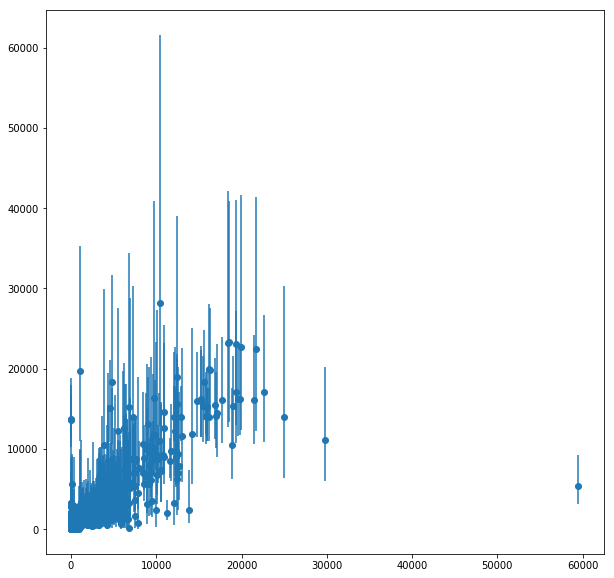

In [16]:
# plot

from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
# plt.xlim([0,4000])
# plt.ylim([0,4000])
plt.errorbar(x=cq["real"],y=cq["mean"], fmt='o', yerr=(cq["mean"]-cq["mean-1std"],cq["mean+1std"]-cq["mean"]))

In [18]:
# look at accuracy

correct=0
total_amount=cq.shape[0]
i=0
for k, r in cq.iterrows():
    if r["real"] < r["mean+1std"] and r["real"] > r["mean-1std"]:
        correct+=1.
    i+=1
print("accuracy: ", correct/total_amount)

accuracy:  0.6701117318435754
